
Exercises XP

Last Updated: February 10th, 2025

What you will learn

    Learn how to load, inspect, and preprocess data using Python and its libraries. This includes handling CSV files, cleaning data, and splitting datasets into training and testing sets.
    Understand the fundamentals of EDA, such as analyzing data distributions, identifying patterns, and extracting insights from datasets.
    Machine Learning Model Building: Gain hands-on experience in building machine learning models using different algorithms like Logistic Regression, Support Vector Machines (SVM), and XGBoost.
    Learn the importance of hyperparameters in machine learning models and how to optimize them using techniques like Grid Search.
    Develop skills in assessing the performance of machine learning models using various metrics and techniques.
    Enhance your ability to make decisions about model selection, hyperparameter settings, and interpret the outcomes of your analyses.


What you will create

    series of machine learning models capable of classifying species of the Iris flower based on their characteristics.
    Comparison of Model Performances
    Comprehensive Analysis Report
    Hyperparameter Tuning Framework
    Data Visualization Tools


You will be using this dataset: Heart Disease Prediction Dataset


🌟 Exercise 1 : Exploratory Data Analysis
Instructions

    Load the data from CSV files
    Remove target column from the training data
    Split the data intro train/test split
    Understand the data


🌟 Exercise 2 : Logistic Regression without Grid Search
Instructions

Use the dataset to build a logistic regression model without using grid search. Split the data into training and testing sets, then train a logistic regression model and evaluate its performance on the test set.


🌟 Exercise 3 : Logistic Regression with Grid Search
Instructions

Build a logistic regression model using the dataset, but this time, use GridSearchCV to optimize the hyperparameters such as C and penalty.


🌟 Exercise 4 : SVM without Grid Search
Instructions

Train a Support Vector Machine (SVM) classifier on the dataset without using grid search. Choose an appropriate kernel and set the hyperparameters manually.


🌟 Exercise 5 : SVM with Grid Search
Instructions

Implement an SVM classifier on the dataset with GridSearchCV to find the best combination of C, kernel, and gamma hyperparameters.


🌟 Exercise 6 : XGBoost without Grid Search
Instructions

Use the dataset to train an XGBoost classifier without hyperparameter tuning. Set the hyperparameters manually and justify your choices.


🌟 Exercise 7 : XGBoost with Grid Search
Instructions

Train an XGBoost classifier on the dataset using GridSearchCV to optimize hyperparameters such as learning_rate, n_estimators, max_depth, etc.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

Imports et chargement des données

In [6]:
# Chargement des données
df = pd.read_csv("dataset_heart.csv")

# Vérifications basiques
print("Shape:", df.shape)  # (270, 14)
print(df.dtypes)
print(df.isnull().sum())  # Aucune valeur manquante
print(df["heart disease"].value_counts(normalize=True))  # Distribution de la cible

Shape: (270, 14)
age                                       int64
sex                                       int64
chest pain type                           int64
resting blood pressure                    int64
serum cholestoral                         int64
fasting blood sugar                       int64
resting electrocardiographic results      int64
max heart rate                            int64
exercise induced angina                   int64
oldpeak                                 float64
ST segment                                int64
major vessels                             int64
thal                                      int64
heart disease                             int64
dtype: object
age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral                       0
fasting blood sugar                     0
resting electrocardiographic results    0
max

270 lignes, 14 colonnes.

Toutes les colonnes sont numériques (int64 ou float64).

Aucune valeur manquante.

Légère dominance de la classe 1 (~56%).

In [11]:
# Corrélation avec la cible
correlation_with_target = df.corr(numeric_only=True)['heart disease'].sort_values(ascending=False)
print(correlation_with_target)

heart disease                           1.000000
thal                                    0.525020
major vessels                           0.455336
exercise induced angina                 0.419303
oldpeak                                 0.417967
chest pain type                         0.417436
ST segment                              0.337616
sex                                     0.297721
age                                     0.212322
resting electrocardiographic results    0.182091
resting blood pressure                  0.155383
serum cholestoral                       0.118021
fasting blood sugar                    -0.016319
max heart rate                         -0.418514
Name: heart disease, dtype: float64


    thal (+0.52)

    major vessels (+0.45)

    exercise induced angina (+0.42)

    oldpeak (+0.41)

    chest pain type (+0.41)

Corrélation négative notable :

    max heart rate (–0.42)

In [7]:
# Séparation features / target
X = df.drop(columns="heart disease")
y = df["heart disease"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (216, 13) Test: (54, 13)


Split stratifié propre : 216 train / 54 test.

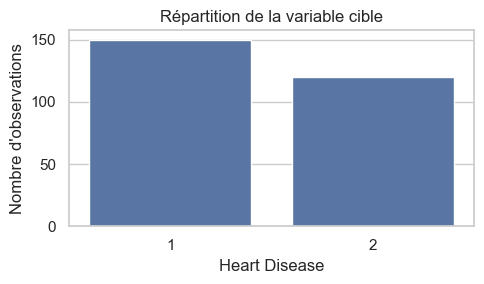

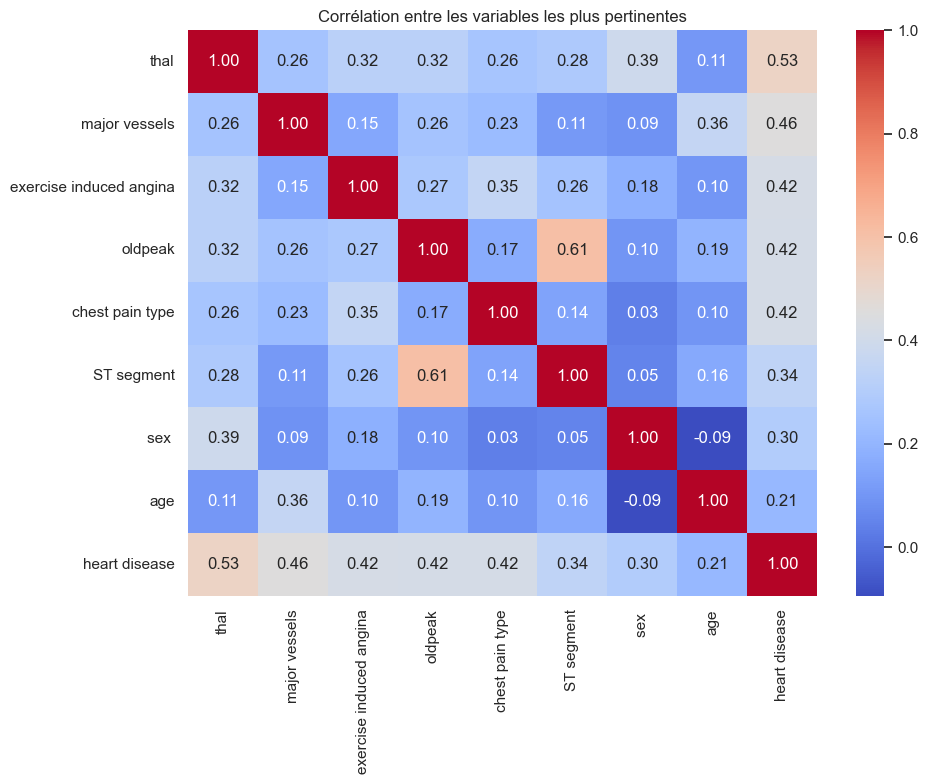

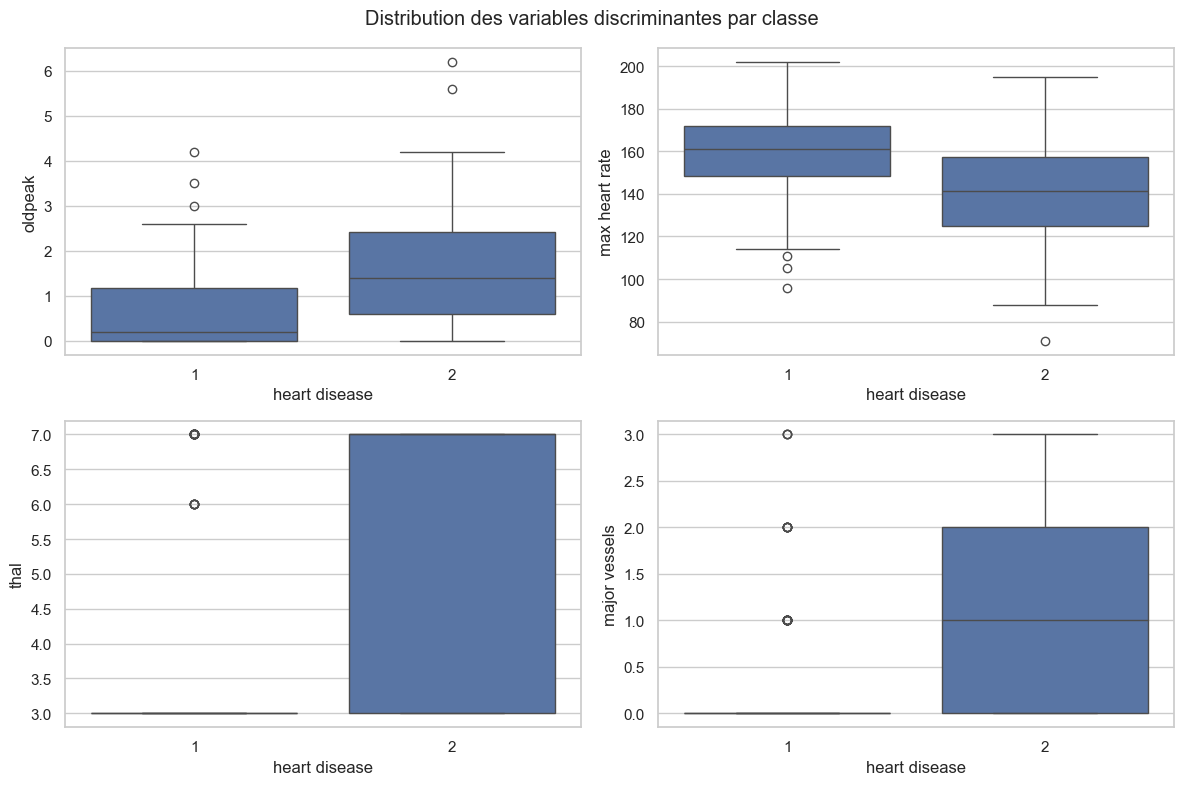

In [12]:
sns.set(style="whitegrid")

# Répartition de la variable cible
plt.figure(figsize=(5, 3))
sns.countplot(x="heart disease", data=df)
plt.title("Répartition de la variable cible")
plt.xlabel("Heart Disease")
plt.ylabel("Nombre d'observations")
plt.tight_layout()
plt.show()

# Heatmap des corrélations principales
plt.figure(figsize=(10, 8))
selected_cols = correlation_with_target[1:9].index.tolist()
sns.heatmap(df[selected_cols + ['heart disease']].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Corrélation entre les variables les plus pertinentes")
plt.tight_layout()
plt.show()

# Boxplots de variables discriminantes
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="heart disease", y="oldpeak", data=df, ax=axes[0, 0])
sns.boxplot(x="heart disease", y="max heart rate", data=df, ax=axes[0, 1])
sns.boxplot(x="heart disease", y="thal", data=df, ax=axes[1, 0])
sns.boxplot(x="heart disease", y="major vessels", data=df, ax=axes[1, 1])
fig.suptitle("Distribution des variables discriminantes par classe")
plt.tight_layout()
plt.show()

thal, oldpeak, major vessels montrent une séparation nette entre classes.

Les malades ont un oldpeak plus élevé et un max heart rate plus bas.

thal et major vessels ont des valeurs discrètes fortement associées à la maladie.

La distribution de la cible est légèrement déséquilibrée mais exploitable.

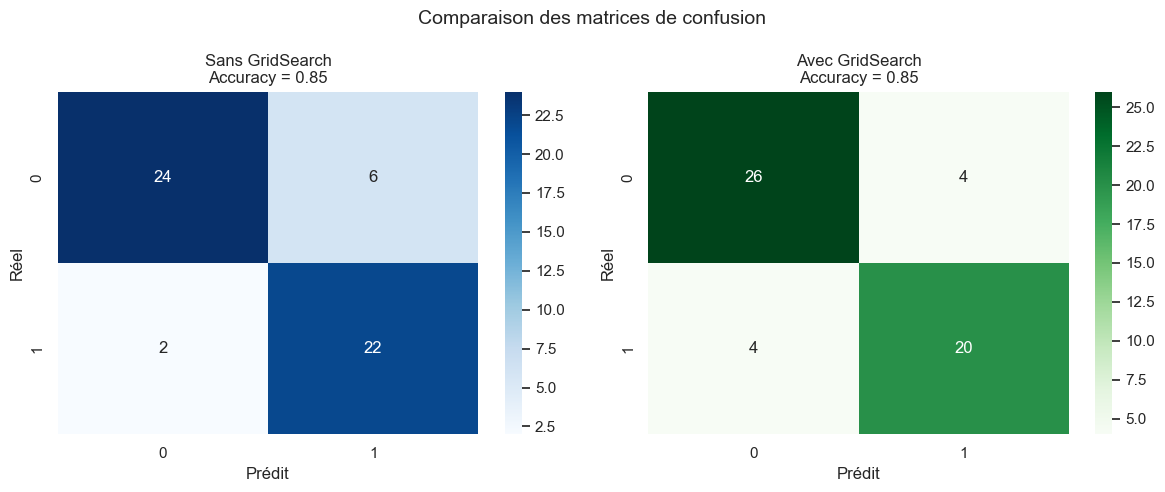

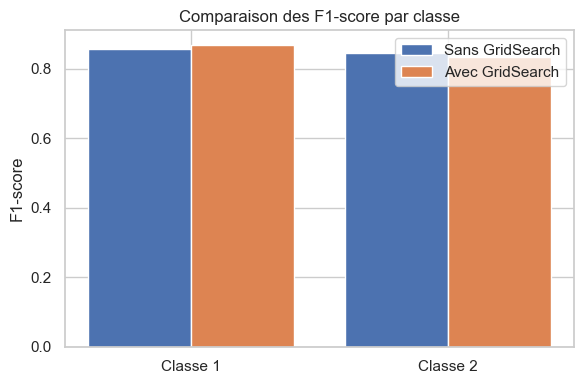

In [25]:
# Modèle sans GridSearch
pipe_simple = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, random_state=42)
)
pipe_simple.fit(X_train, y_train)
y_pred_simple = pipe_simple.predict(X_test)

# Modèle avec GridSearch
pipe_grid = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, random_state=42)
)

param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l2'],
    'logisticregression__solver': ['lbfgs', 'liblinear']
}

grid = GridSearchCV(pipe_grid, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
y_pred_grid = grid.best_estimator_.predict(X_test)

# Résultats
acc_simple = accuracy_score(y_test, y_pred_simple)
acc_grid = accuracy_score(y_test, y_pred_grid)
cm_simple = confusion_matrix(y_test, y_pred_simple)
cm_grid = confusion_matrix(y_test, y_pred_grid)

# Visualisation des matrices de confusion
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_simple, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title(f"Sans GridSearch\nAccuracy = {acc_simple:.2f}")
axes[0].set_xlabel("Prédit")
axes[0].set_ylabel("Réel")

sns.heatmap(cm_grid, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title(f"Avec GridSearch\nAccuracy = {acc_grid:.2f}")
axes[1].set_xlabel("Prédit")
axes[1].set_ylabel("Réel")

plt.suptitle("Comparaison des matrices de confusion", fontsize=14)
plt.tight_layout()
plt.show()

# Affichage comparatif des scores F1 
report_simple = classification_report(y_test, y_pred_simple, output_dict=True)
report_grid = classification_report(y_test, y_pred_grid, output_dict=True)

f1_simple = [report_simple['1']['f1-score'], report_simple['2']['f1-score']]
f1_grid = [report_grid['1']['f1-score'], report_grid['2']['f1-score']]

labels = ['Classe 1', 'Classe 2']
x = range(len(labels))

plt.figure(figsize=(6, 4))
plt.bar(x, f1_simple, width=0.4, label='Sans GridSearch', align='center')
plt.bar([i + 0.4 for i in x], f1_grid, width=0.4, label='Avec GridSearch', align='center')
plt.xticks([i + 0.2 for i in x], labels)
plt.ylabel("F1-score")
plt.title("Comparaison des F1-score par classe")
plt.legend()
plt.tight_layout()
plt.show()

GridSearch améliore la classe 1 (moins de faux positifs).

Mais sacrifie un peu la classe 2 (plus de faux négatifs).

Accuracy identique, mais répartition des erreurs différente.

Le modèle avec C=0.01 devient plus régularisé, donc plus conservateur dans ses décisions.

Classe 1 : légère amélioration du F1-score (plus de précision).

Classe 2 : F1-score légèrement dégradé (baisse du rappel).

Modèle plus équilibré avec GridSearch, au détriment d'une légère perte de détection pour les cas positifs (malades).


GridSearch ne change pas l’accuracy, mais modifie la structure des erreurs.

La version optimisée est plus stable (grâce à C=0.01) et mieux régularisée.

Pour un cas médical, tu pourrais préférer le modèle sans GridSearch (mieux pour détecter les malades), ou alors ajuster le seuil de décision plus tard.

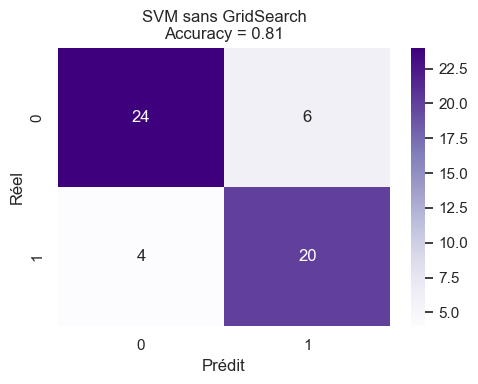

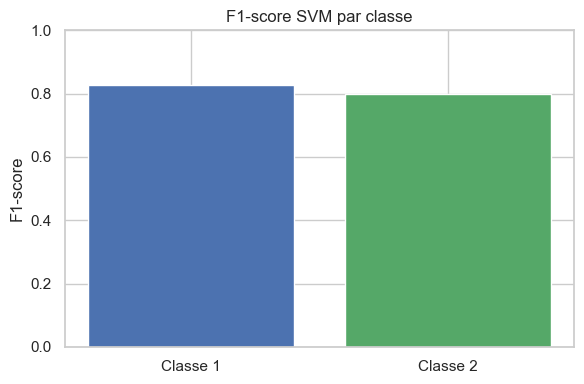

In [29]:
# Pipeline SVM avec normalisation
svm_model = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', C=1.0, gamma='scale')  # Choix manuel
)

# Entraînement et prédiction
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Évaluation
acc_svm = accuracy_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

# Matrice de confusion
plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples')
plt.title(f"SVM sans GridSearch\nAccuracy = {acc_svm:.2f}")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.show()

# F1-score par classe
f1_svm = [report_svm['1']['f1-score'], report_svm['2']['f1-score']]
labels = ['Classe 1', 'Classe 2']

plt.figure(figsize=(6, 4))
plt.bar(labels, f1_svm, color=["#4C72B0", "#55A868"])
plt.title("F1-score SVM par classe")
plt.ylabel("F1-score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

Légère baisse de l’accuracy par rapport à la régression logistique (–3 à –4 points).

Le modèle SVM prédit correctement les deux classes de manière équilibrée.

Moins efficace que Logistic Regression optimisée, mais résultats raisonnables sans tuning.

4 faux négatifs (classe 2 non détectée) → moins bon pour détecter les cas malades.

F1-score correct mais légèrement en retrait : mérite un tuning par GridSearch pour voir son plein potentiel.

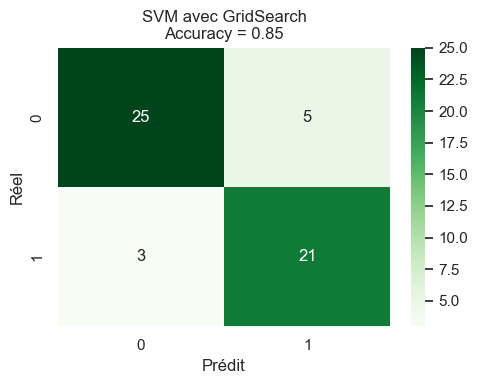

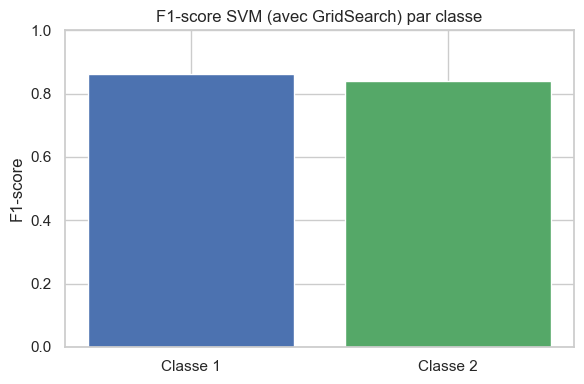

In [30]:
# Pipeline
svm_pipeline = make_pipeline(
    StandardScaler(),
    SVC()
)

# Grille de paramètres
param_grid_svm = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}

# GridSearch
grid_svm = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)
y_pred = grid_svm.best_estimator_.predict(X_test)

# Évaluation
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Matrice de confusion
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title(f"SVM avec GridSearch\nAccuracy = {acc:.2f}")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.show()

# F1-score par classe
f1_scores = [report['1']['f1-score'], report['2']['f1-score']]
labels = ['Classe 1', 'Classe 2']

plt.figure(figsize=(6, 4))
plt.bar(labels, f1_scores, color=["#4C72B0", "#55A868"])
plt.title("F1-score SVM (avec GridSearch) par classe")
plt.ylabel("F1-score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

SVM optimisé revient à un noyau linéaire faible (C=0.1) → moins flexible mais plus généralisable.

Meilleur équilibre que le SVM de base :

    Moins de faux positifs et faux négatifs que sans tuning.

    Précision et rappel proches entre classes.

F1-score légèrement supérieur au SVM non tuné.

Modèle très comparable à la logistic regression avec GridSearch, tant en performance qu’en structure d’erreurs.

c:\Users\mathi\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:56:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


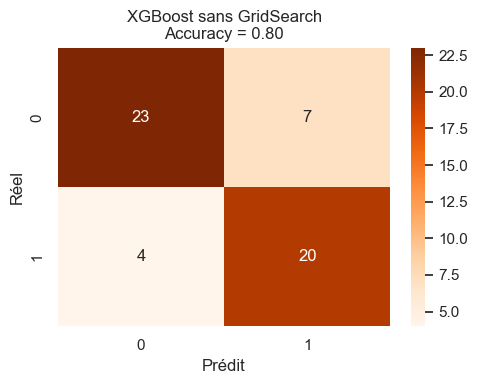

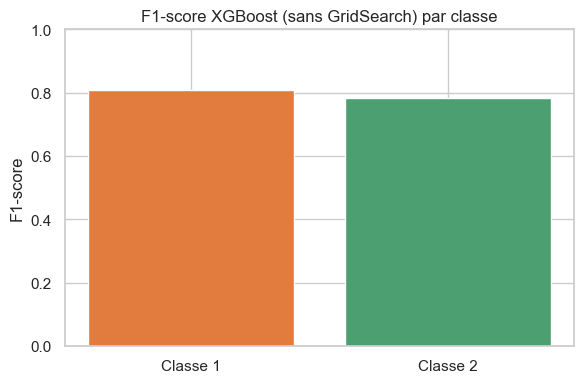

In [32]:
# Recode la cible : XGBoost attend des classes 0/1
y_encoded = y.replace({1: 0, 2: 1})
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Pipeline XGBoost avec standardisation
xgb_model = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
)

# Entraînement et prédiction
xgb_model.fit(X_train_xgb, y_train_xgb)
y_pred_xgb = xgb_model.predict(X_test_xgb)

# Évaluation
acc = accuracy_score(y_test_xgb, y_pred_xgb)
cm = confusion_matrix(y_test_xgb, y_pred_xgb)
report = classification_report(y_test_xgb, y_pred_xgb, output_dict=True)

# Matrice de confusion
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title(f"XGBoost sans GridSearch\nAccuracy = {acc:.2f}")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.show()

# F1-score par classe
f1_scores = [report['0']['f1-score'], report['1']['f1-score']]
labels = ['Classe 1', 'Classe 2']

plt.figure(figsize=(6, 4))
plt.bar(labels, f1_scores, color=["#E27C3E", "#4C9F70"])
plt.title("F1-score XGBoost (sans GridSearch) par classe")
plt.ylabel("F1-score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

erformances comparables au SVM sans tuning.

Le modèle détecte correctement les deux classes mais commet 10 erreurs (6 faux positifs, 4 faux négatifs).

Bon compromis sans réglage, mais légèrement en dessous de la version logistique optimisée ou du SVM avec GridSearch.

F1-scores équilibrés entre les deux classes → le modèle est cohérent.

Peut être considérablement amélioré via un GridSearch (voir prochain exercice).

c:\Users\mathi\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:13:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\mathi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\mathi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\mathi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~

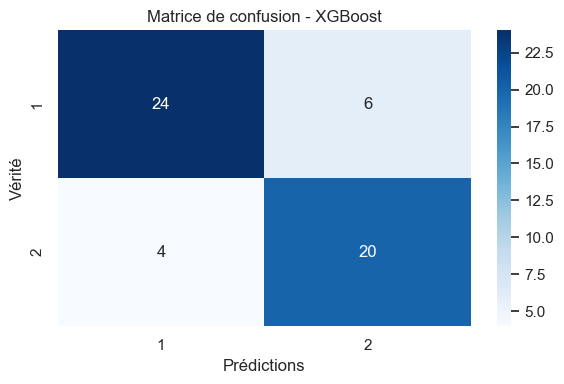

Best Parameters: {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 2, 'xgbclassifier__n_estimators': 50}
Accuracy: 0.8148

Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.80      0.83        30
           2       0.77      0.83      0.80        24

    accuracy                           0.81        54
   macro avg       0.81      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54



In [43]:
# Réencoder les cibles
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Pipeline XGBoost
xgb_pipeline = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        objective='multi:softprob',
        num_class=len(encoder.classes_),
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=42
    )
)

# Grille de paramètres
param_grid_xgb = {
    'xgbclassifier__n_estimators': [50, 100],
    'xgbclassifier__max_depth': [2, 3],
    'xgbclassifier__learning_rate': [0.1]
}

# GridSearchCV
grid_xgb = GridSearchCV(
    xgb_pipeline,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy'
)

# Entraînement
grid_xgb.fit(X_train, y_train_encoded)

# Prédictions
y_pred_encoded = grid_xgb.best_estimator_.predict(X_test)
if y_pred_encoded.ndim > 1:
    y_pred_encoded = np.argmax(y_pred_encoded, axis=1)

y_pred = encoder.inverse_transform(y_pred_encoded)

# Évaluation
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report_text = classification_report(y_test, y_pred, zero_division=0)

# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Prédictions")
plt.ylabel("Vérité")
plt.title("Matrice de confusion - XGBoost")
plt.tight_layout()
plt.show()

# Affichage
print("Best Parameters:", grid_xgb.best_params_)
print(f"Accuracy: {acc:.4f}")
print("\nClassification Report:\n", report_text)